**DATASET DESCRIPTION**


**Dataset name : Austin Weather**

Dataset description :
The dataset is derived from Kaggle’s repository.
The forecasts are generated from Austin KATT station’s proprietary forecasting system that leverages their vast amount of neighborhood weather data that they get from their community.
 
Dataset Attributes:
The dataset has 21 attributes. Each tells a measure used to display as the weather forecast
Attributes
Description
Date
(YYYY-MM-DD)  
Dates are from 2013-12-21 to 2017-07-31
<br>
TempHighF
 (High temperature, in Fahrenheit)
 <br>
TempAvgF
(Average temperature, in Fahrenheit)
<br>
TempLowF
(Low temperature, in Fahrenheit)
<br>
DewPointHighF
(High dew point, in Fahrenheit)
<br>
DewPointAvgF
 (Average dew point, in Fahrenheit)
 <br>
DewPointLowF
 (Low dew point, in Fahrenheit)
 <br>
HumidityHighPercent
 (High humidity, as a percentage)
 <br>
HumidityAvgPercent 
 (Average humidity, as a percentage)
 <br>
HumidityLowPercent 
(Low humidity, as a percentage)
<br>
SeaLevelPressureHighInches
(High sea level pressure, in inches)
<br>
SeaLevelPressureAvgInches
(Average sea level pressure, in inches)
<br>
SeaLevelPressureLowInches
(Low sea level pressure, in inches)
<br>
VisibilityHighMiles
 (High visibility, in miles)
 <br>
VisibilityAvgMiles
(Average visibility, in miles)
<br>
VisibilityLowMiles
 (Low visibility, in miles)
 <br>
WindHighMPH
 (High wind speed, in miles per hour)
 <br>
WindAvgMPH
(Average wind speed, in miles per hour)
<br>
WindGustMPH
 (Highest wind speed gust, in miles per hour)
 <br>
PrecipitationSumInches
Total precipitation, in inches) ('T' if Trace)
<br>
Events
(Adverse weather events. ' ' if None)(Nan)
<br>

class attribute:
'Events'

Dataset Sample:
Dataset has 1320 samples collected by Austin KATT station.


In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving austin_weather_preprocessed_2147250.csv to austin_weather_preprocessed_2147250 (3).csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

warnings.filterwarnings('ignore')

df = pd.read_csv(io.BytesIO(uploaded['austin_weather_preprocessed_2147250.csv']))
print(df.head().to_markdown())

df.columns

|    | Date       |   TempHighF |   TempAvgF |   TempLowF |   DewPointHighF |   DewPointAvgF |   DewPointLowF |   HumidityHighPercent |   HumidityAvgPercent |   HumidityLowPercent |   SeaLevelPressureHighInches |   SeaLevelPressureAvgInches |   SeaLevelPressureLowInches |   VisibilityHighMiles |   VisibilityAvgMiles |   VisibilityLowMiles |   WindHighMPH |   WindAvgMPH |   WindGustMPH |   PrecipitationSumInches | Events              |
|---:|:-----------|------------:|-----------:|-----------:|----------------:|---------------:|---------------:|----------------------:|---------------------:|---------------------:|-----------------------------:|----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------:|-------------:|--------------:|-------------------------:|:--------------------|
|  0 | 2013-12-21 |          74 |         60 |         45 |              67 |             49 |             43 |           

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches',
       'Events'],
      dtype='object')

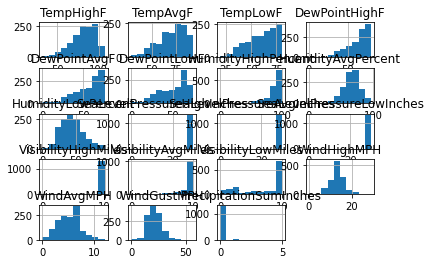

In [ ]:
#Drop the columns with the non numerical values.
df1 = df
num_df = df1.drop(['Date'], axis=1)

num_df.columns
num_df.hist()
num_df['Events']=labelencoder.fit_transform(num_df['Events'])
# Bring the class attribute as the last column

temp_series = num_df.pop('Events')
num_df['Events'] = temp_series
num_df.columns

In [ ]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29,29,10,7,2,20,4,31,0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30,29,10,10,5,16,6,25,0,NaN
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30,30,10,10,10,8,3,12,0,NaN
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30,30,10,10,7,12,4,20,0,NaN
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30,30,10,10,7,10,2,16,0,NaN


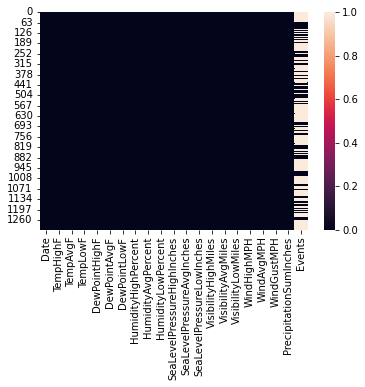

In [ ]:
sns.heatmap(df.isnull())

It is a heat map which is used here to depict null values in different color.
If there are no null values then whole heatmap would be of one color.
but here in 'Events' attribute there are few null values.

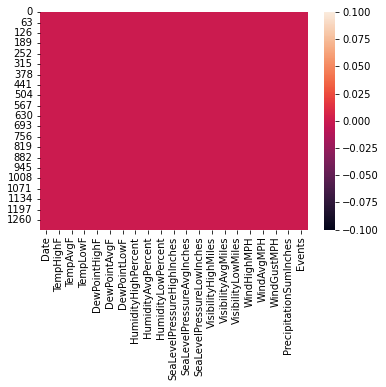

In [ ]:
df.fillna(0, inplace = True)
sns.heatmap(df.isnull())

There are no null values hence whole heatmap is depicted in one color.

In [ ]:
df.nunique()

Date                          1319
TempHighF                       74
TempAvgF                        64
TempLowF                        61
DewPointHighF                   64
DewPointAvgF                    66
DewPointLowF                    73
HumidityHighPercent             58
HumidityAvgPercent              69
HumidityLowPercent              82
SeaLevelPressureHighInches       3
SeaLevelPressureAvgInches        3
SeaLevelPressureLowInches        3
VisibilityHighMiles              5
VisibilityAvgMiles              10
VisibilityLowMiles              11
WindHighMPH                     22
WindAvgMPH                      13
WindGustMPH                     37
PrecipitationSumInches           6
Events                           9
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60a1d77350>,
      dtype=object)

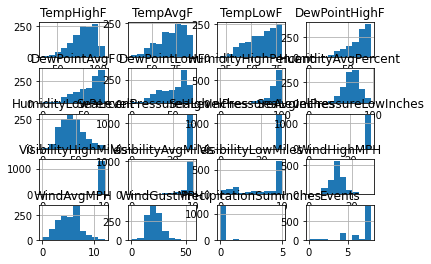

In [ ]:
num_df.columns
num_df.hist()

We have plotted the histograms for all the relevant independent features along with the dependant feature.<br>
This can be used to see the quantities or number of items for each feature.
<br> example - IN 'Events' attribute more samples belong to EVENT 7

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Year
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29,10,7,2,20,4,31,0,"Rain , Thunderstorm",2013
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,29,10,10,5,16,6,25,0,0,2013
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30,10,10,10,8,3,12,0,0,2013
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30,10,10,7,12,4,20,0,0,2013
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30,10,10,7,10,2,16,0,0,2013


**lab1 ---------------------------------------------------------------EDA-----------------------------------------------------------------------------------------**

In [ ]:
import matplotlib.pyplot as plt
grp_tempavg_yr=df['TempAvgF'].groupby(df['Year']).mean()

line plot

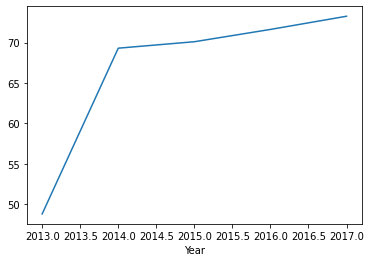

In [ ]:
grp_tempavg_yr.plot(x="TempAvgF", y="Year")

we can see that around 2013 to 14  thre is steep increase in AVGtempF but in after 2014 to 2017 there is gradual increase

**Box plot** - display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

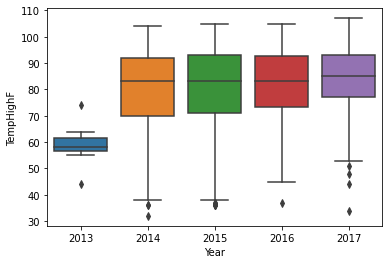

In [ ]:
boxplot = sns.boxplot(x='Year', y='TempHighF',  data=df)

**Map func** - map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

<br>
We can infer that there are quite few outliers in each years data set.

In [ ]:
mapfunc = df['TempAvgF'].map(lambda x:x>50)
print(mapfunc)

0        True
1       False
2       False
3       False
4       False
        ...  
1314     True
1315     True
1316     True
1317     True
1318     True
Name: TempAvgF, Length: 1319, dtype: bool


**Rename** - rename() method is used to rename any index, column or row. Renaming of column can also be done by dataframe.

In [ ]:
df.rename(str.lower, axis='columns')

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,...,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,precipitationsuminches,events,year
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29,10,7,2,20,4,31,0,"Rain , Thunderstorm",2013
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,29,10,10,5,16,6,25,0,0,2013
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30,10,10,10,8,3,12,0,0,2013
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30,10,10,7,12,4,20,0,0,2013
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30,10,10,7,10,2,16,0,0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29,10,10,10,12,5,21,0,0,2017
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29,10,10,10,14,5,20,0,0,2017
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29,10,10,10,12,4,17,0,0,2017
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29,10,10,10,13,4,20,0,0,2017


**Bar graph** -  A bar chart describes the comparisons between the discrete categories.

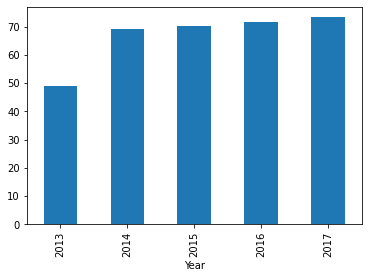

In [ ]:
bargraph=grp_tempavg_yr.plot.bar(x="Year", y="TempAvgF")

This bar graph helps us to identify the quantity of data samples belonging to each year agains the average temperature

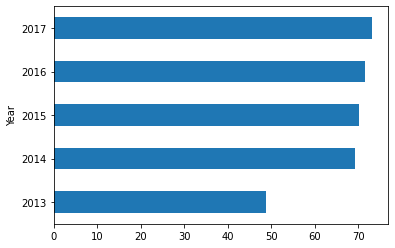

In [ ]:
barhgraph=grp_tempavg_yr.plot.barh(x="Year", y="TempAvgF")

This bar graph helps us to identify the quantity of data samples belonging to each year agains the average temperature

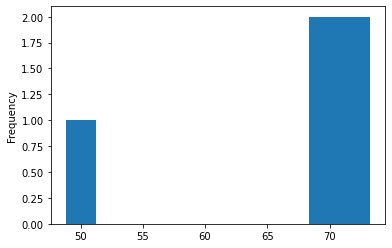

In [ ]:
histplot = grp_tempavg_yr.plot.hist( by="Year")

**Pair plot**- Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.



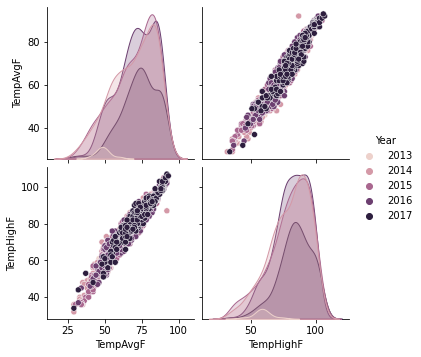

In [ ]:
col=['TempAvgF', 'TempHighF', 'Year']
sns.pairplot(df[col],  hue ='Year')
plt.show()
  

**Pair plot**- Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.


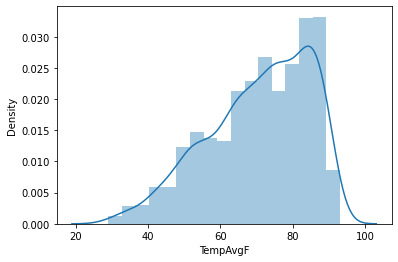

In [ ]:
sns.distplot(df.TempAvgF)

**Dist plot** - It represents the data distribution of a variable against the density distribution. 

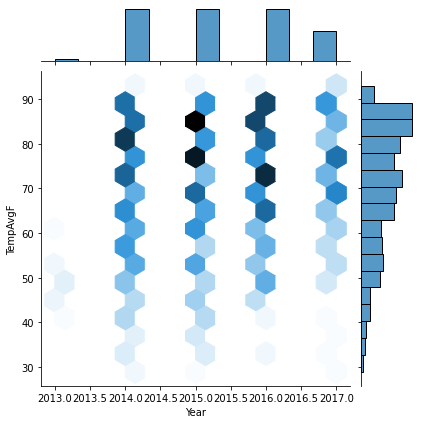

In [ ]:
sns.jointplot(x = "Year", y = "TempAvgF",kind = "hex", data = df)

Joint plot - helps to explore relationships between bivariate data, as well as their distributions at the same time

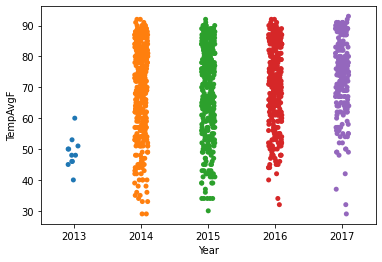

In [ ]:
sns.stripplot(x="Year", y="TempAvgF", data=df)

Stripplot is helping us to clearly depict the quantity of samples belonging to each year.

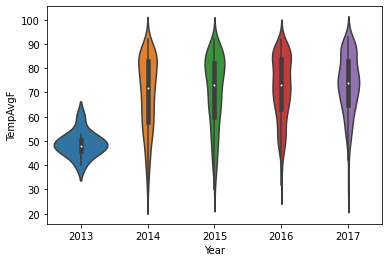

In [ ]:
sns.violinplot(x="Year", y="TempAvgF", data=df)

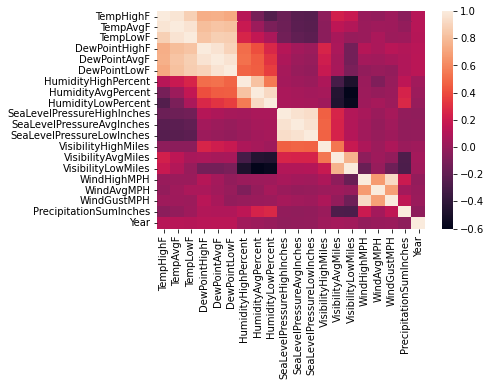

In [ ]:
hm = sns.heatmap(df.corr())

Heat map depicting the correlation between each features and hence we can identify the most important features.

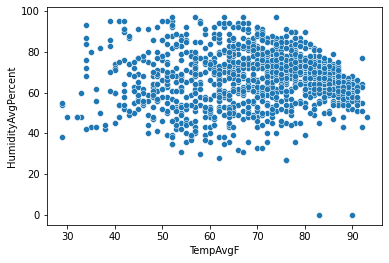

In [ ]:
sns.scatterplot(data=df, x="TempAvgF", y="HumidityAvgPercent", )

scatter plot of humidity vs average temperature for the given samples.

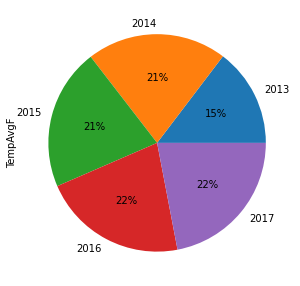

In [ ]:
plot = grp_tempavg_yr.plot.pie(y='TempAvgF', autopct='%1.0f%%', figsize=(5, 5))


Average temperature in PIE graph depicting that most of the samples have avearge temperature.

In [ ]:
df.corr()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Year
TempHighF,1.000000,0.970655,0.881977,0.744612,0.755616,0.725671,0.123647,-0.116141,-0.256256,-0.159230,-0.226134,-0.241449,-0.028280,0.226655,0.190855,0.012029,-0.009297,0.027676,-0.040145,0.123608
TempAvgF,0.970655,1.000000,0.968573,0.808014,0.837222,0.820421,0.192456,0.022763,-0.096187,-0.151205,-0.219854,-0.235022,-0.043128,0.148463,0.100722,0.014119,0.034267,0.026663,-0.006498,0.123498
TempLowF,0.881977,0.968573,1.000000,0.832384,0.877662,0.874380,0.252131,0.165002,0.074977,-0.132734,-0.199543,-0.213699,-0.042962,0.064996,0.002420,0.015882,0.076016,0.024319,0.030472,0.117036
DewPointHighF,0.744612,0.808014,0.832384,1.000000,0.967754,0.898026,0.510722,0.409717,0.263818,0.112964,0.048674,0.023162,0.250751,0.077431,-0.130295,0.117151,0.074983,0.125768,0.101778,0.127251
DewPointAvgF,0.755616,0.837222,0.877662,0.967754,1.000000,0.967514,0.520575,0.450622,0.317731,0.083833,0.019924,0.001424,0.216995,0.056602,-0.129497,0.054142,0.038257,0.062522,0.093984,0.132896
DewPointLowF,0.725671,0.820421,0.874380,0.898026,0.967514,1.000000,0.481106,0.458124,0.355761,0.061904,0.003088,-0.009150,0.184720,0.064665,-0.104077,-0.013514,0.001407,-0.008039,0.096690,0.135333
HumidityHighPercent,0.123647,0.192456,0.252131,0.510722,0.520575,0.481106,1.000000,0.828398,0.553781,0.054016,0.031127,0.016027,0.084664,-0.304546,-0.477612,0.013986,-0.086840,0.004679,0.146984,0.041886
HumidityAvgPercent,-0.116141,0.022763,0.165002,0.409717,0.450622,0.458124,0.828398,1.000000,0.923541,0.071054,0.058778,0.047436,0.062050,-0.449230,-0.600088,0.024878,-0.000472,0.017390,0.247373,0.022695
HumidityLowPercent,-0.256256,-0.096187,0.074977,0.263818,0.317731,0.355761,0.553781,0.923541,1.000000,0.069814,0.066427,0.059680,0.035198,-0.459657,-0.566181,0.026541,0.058757,0.023175,0.268836,0.000834
SeaLevelPressureHighInches,-0.159230,-0.151205,-0.132734,0.112964,0.083833,0.061904,0.054016,0.071054,0.069814,1.000000,0.959644,0.942977,0.466448,0.254323,0.105335,0.066364,0.014496,0.058675,-0.013192,-0.019257


In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=0, strategy='mean', fill_value=None)
print(df)

            Date  TempHighF  TempAvgF  TempLowF  DewPointHighF  DewPointAvgF  \
0     2013-12-21         74        60        45             67            49   
1     2013-12-22         56        48        39             43            36   
2     2013-12-23         58        45        32             31            27   
3     2013-12-24         61        46        31             36            28   
4     2013-12-25         58        50        41             44            40   
...          ...        ...       ...       ...            ...           ...   
1314  2017-07-27        103        89        75             71            67   
1315  2017-07-28        105        91        76             71            64   
1316  2017-07-29        107        92        77             72            64   
1317  2017-07-30        106        93        79             70            68   
1318  2017-07-31         99        88        77             66            61   

      DewPointLowF  HumidityHighPercent

--------------------------------------------- list for all accuracy -----------------------------------------

In [ ]:
classiferList = ["KNN", "Naive bayes", "K means", "Hierarchial", "Decision Tree", "Linear Regression", "Logistic regression", "SVM", "MLP"]
accuracyList = []

acc_dict = {'KNN':0, "Naive bayes":0, "Kmeans":0, "Hierarchial":0, "DecisionTree":0, "LinearRegression":0, "LogisticRegression":0, "SVM":0,"MLP":0}

**lab2 ---------------------------------------------------------------KNN-----------------------------------------------------------------------------------------**

K-NN algorithm can be used for Classification as well as for Regression.
It is used for Supervised Learning.
<br>

It classifies the data point on how its neighbor is classified

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  

In [ ]:
#here we have given k values from 2 to 6 and n= 1, 2, 3
for i in range(2,7):
  for n in range(1,4):
    print("----------------------------------------K = "+str(i)+" N ="+str(n))
    classifier= KNeighborsClassifier(n_neighbors=5, p=1)  
    classifier.fit(x_train, y_train) 
    y_pred = classifier.predict(x_test)


    result = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, y_pred)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test,y_pred)
    print("Accuracy:",result2*100)
    

----------------------------------------K = 2 N =1
Confusion Matrix:
[[  1   0   0   0   0   0   0   3]
 [  0   0   0   2   0   1   0   0]
 [  0   0   2   3   0   1   0   0]
 [  1   0   1  19   0   6   0  24]
 [  0   0   0   0   0   0   0   1]
 [  0   0   3   4   0   9   0  13]
 [  0   0   0   0   0   0   0   3]
 [  1   0   0   5   0   4   0 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.00      0.00      0.00         3
           2       0.33      0.33      0.33         6
           4       0.58      0.37      0.45        51
           5       0.00      0.00      0.00         1
           6       0.43      0.31      0.36        29
           7       0.00      0.00      0.00         3
           8       0.84      0.96      0.89       233

    accuracy                           0.77       330
   macro avg       0.31      0.28      0.29       330
weighted avg       0.73      0.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
acc_score = accuracy_score(y_pred,y_test) 
print("Accuracy score",acc_score)
acc_dict['KNN']=round(acc_score,3)
print(acc_dict)

              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.00      0.00      0.00         3
           2       0.12      0.17      0.14         6
           4       0.51      0.37      0.43        51
           5       0.00      0.00      0.00         1
           6       0.37      0.24      0.29        29
           7       0.00      0.00      0.00         3
           8       0.85      0.94      0.89       233

    accuracy                           0.75       330
   macro avg       0.25      0.25      0.24       330
weighted avg       0.71      0.75      0.73       330

[[  1   0   0   0   0   0   0   3]
 [  0   0   0   2   0   1   0   0]
 [  0   0   1   5   0   0   0   0]
 [  2   0   2  19   0   7   0  21]
 [  0   0   0   0   0   0   0   1]
 [  1   0   5   4   0   7   0  12]
 [  0   0   0   0   0   0   0   3]
 [  2   0   0   7   0   4   0 220]]
Accuracy score 0.7515151515151515
{'KNN': 0.752, 'Naive bayes': 0, '

**lab3 --------------------------------------------------------------Naive Bayes-------------------------------------------------------------------------------**

It is a probabilistic classifier for supervised learning which means it predicts on the basis of the probability of an object.

In [ ]:
x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  


# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# predicting the values
y_pred = gnb.predict(x_test)
y_pred

array([7, 6, 8, 7, 8, 7, 7, 7, 6, 7, 8, 0, 7, 2, 6, 7, 1, 8, 7, 8, 7, 8,
       7, 8, 4, 4, 4, 8, 8, 8, 7, 7, 8, 6, 7, 7, 8, 8, 8, 7, 8, 0, 7, 7,
       8, 7, 2, 7, 7, 8, 7, 6, 7, 7, 7, 8, 0, 7, 8, 7, 7, 6, 6, 7, 7, 8,
       7, 8, 6, 7, 7, 6, 7, 8, 7, 7, 7, 7, 7, 6, 2, 0, 7, 7, 7, 7, 4, 7,
       7, 7, 7, 7, 6, 6, 7, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 8, 2,
       7, 7, 7, 8, 7, 6, 7, 7, 8, 7, 7, 7, 8, 8, 6, 7, 7, 0, 7, 7, 4, 7,
       7, 7, 8, 7, 7, 8, 7, 7, 7, 7, 8, 7, 8, 0, 6, 1, 7, 8, 7, 6, 8, 7,
       8, 7, 7, 7, 7, 0, 8, 6, 8, 7, 7, 7, 7, 8, 8, 2, 8, 7, 8, 6, 8, 4,
       6, 7, 7, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 7, 4, 7, 7, 8, 7, 7, 8, 7,
       8, 7, 7, 7, 8, 7, 8, 8, 2, 7, 6, 7, 7, 8, 7, 7, 7, 7, 6, 1, 8, 7,
       7, 0, 7, 7, 7, 4, 6, 8, 8, 8, 7, 7, 7, 7, 7, 2, 8, 8, 7, 8, 0, 0,
       4, 7, 8, 8, 7, 8, 7, 7, 7, 7, 7, 4, 6, 8, 7, 6, 4, 7, 7, 8, 6, 7,
       7, 7, 6, 7, 7, 7, 7, 7, 8, 7, 6, 7, 7, 0, 7, 7, 8, 7, 7, 8, 8, 7,
       7, 8, 8, 7, 7, 7, 7, 7, 8, 6, 7, 7, 0, 8, 2,

In [ ]:
y_pred_train = gnb.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.3539


In [ ]:
# print the scores on training and test set to check over fitting and underfitting

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.3539
Test set score: 0.3455


In [ ]:
from pandas.core.dtypes.cast import maybe_box_native
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

max_acc = max_k = max_n = 0
for k in range(2,7):
  for n in range(1,4):
    classifier = KNeighborsClassifier(n_neighbors=k,p=n)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    if accuracy > max_acc:
      max_acc = accuracy
      max_k = k
      max_n = n

if max_n == 1:
  distance_metric = "manhattan"
elif max_n == 2:
  distance_metric = "euclidean"
elif max_n == 3:
  distance_metric = "minkowsky"


print("--------------------------MAX ACCURACY AMONG KNN CLASSIFIER--------------------------------- ")
print("Max accuracy                             : ",max_acc*100)
print("Distance Metric                          : ",distance_metric)
print("N Distance measurement                   : ",max_n)
print("K number of neighbours for max accuracy  : ",max_k)

--------------------------MAX ACCURACY AMONG KNN CLASSIFIER--------------------------------- 
Max accuracy                             :  75.75757575757575
Distance Metric                          :  minkowsky
N Distance measurement                   :  3
K number of neighbours for max accuracy  :  5


In [ ]:
acc_score = accuracy_score(y_pred,y_test) 
print("Accuracy score",acc_score)
acc_dict["Naive bayes"] =round(acc_score,3)
print(acc_dict)

Accuracy score 0.7484848484848485
{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0, 'Hierarchial': 0, 'DecisionTree': 0, 'LinearRegression': 0, 'LogisticRegression': 0, 'SVM': 0, 'MLP': 0}


**lab4 ----------------------------------------------------------K Means clustering -----------------------------------------------------------------------**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

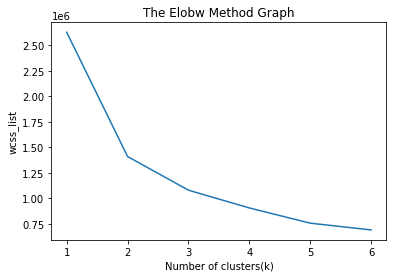

In [ ]:
x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 6.  
for i in range(1, 7):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 7), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

We have used lineplot to depict the best clusters by setting different number of cluster to the naive bayes classifier, hence finding the optimal clusters using the WCSS value obtained during each classification. <br>
From this graph we can infer that the optimal cluster value is 3 as the slope becomes normal

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [ ]:
y_predict

array([1, 4, 4, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(x)
y_pred = kmeans.predict(x)

kmeans.cluster_centers_
kmeans.inertia_

labels = kmeans.labels_
correct_labels = sum(y == labels)
acc_score = correct_labels/float(y.size)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(acc_score))
acc_dict['Kmeans']=round(acc_score,3)
print(acc_dict)

Result: 87 out of 1319 samples were correctly labeled.
Accuracy score: 0.07
{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0, 'DecisionTree': 0, 'LinearRegression': 0, 'LogisticRegression': 0, 'SVM': 0, 'MLP': 0}


**lab5 -----------------------------------------------------------Hierarchial clustering -----------------------------------------------------------------------**

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis 

In [ ]:
X= num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant


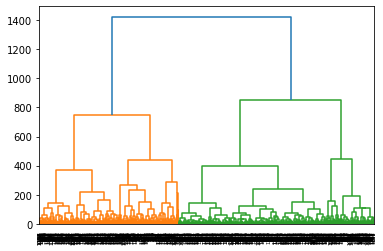

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric= 'euclidean'))

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).
<br> we can see that there are 2 prominent clusters forming.

In [ ]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
X_D = hc.fit(X)
y_pred= hc.fit_predict(X)  
# print the class labels
print(hc.labels_)

[1 1 1 ... 0 0 0]


In [ ]:
acc_score = accuracy_score(y,y_pred)
acc_dict['Hierarchial']=round(acc_score,3)
print(acc_dict)

{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0, 'LinearRegression': 0, 'LogisticRegression': 0, 'SVM': 0, 'MLP': 0}


Text(0, 0.5, 'Events')

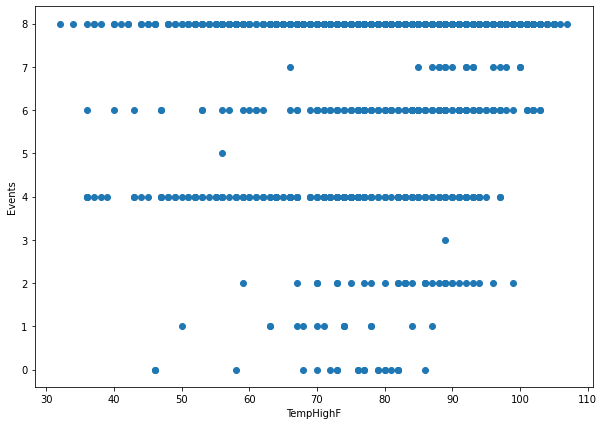

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(num_df['TempHighF'], num_df['Events']) 
plt.xlabel("TempHighF")
plt.ylabel("Events")

Scatter plot for a categorical dataset hence we have got the samples in horizontal lines.

**K means VS Hierarchical**

k means
you should have prior knowledge about the k


---


each data will belong exactly one subset


---


**hierarchical**
no need of k values


---


It is a set of nested clusters that are arranged as a tree.

**lab6 ----------------------------------------------Decision Tree & Linear Regression-------------------------------------------------------------------**

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

#training set size 0.75 - x_train + y_train
#test set size 0.25 - x_test + y_test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)


#reduce the mean to ‘0’ and the standard deviation to ‘1’.
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)


#Gini = 0 means it is the purest node and it is a leaf.
#A Gini coefficient of 0 expresses perfect equality, where all values are the same, while a Gini coefficient of 1 (or 100%) expresses maximal inequality among values. For example, if everyone has the same income, the Gini coefficient will be 0.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Model accuracy score with criterion gini index: 0.7909
              precision    recall  f1-score   support

           0       0.30      0.75      0.43         4
           1       0.00      0.00      0.00         5
           2       0.64      1.00      0.78         9
           4       0.52      0.51      0.51        51
           6       0.53      0.52      0.52        31
           7       0.00      0.00      0.00         1
           8       0.92      0.90      0.91       229

    accuracy                           0.79       330
   macro avg       0.42      0.53      0.45       330
weighted avg       0.79      0.79      0.79       330



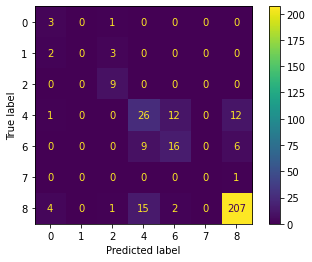

In [ ]:
#x_test acts as question

y_pred_gini = clf_gini.predict(x_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

#answer and predicted
print(classification_report(y_test, y_pred_gini))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_gini, x_test, y_test)  

This heat map is applied for the heat map and it depicts the correctly and wrongly prdicted number of samples. Most of the smaples belonging to class 8 are correctly predicted where others are not predicted. Also there are more flase postives in class 4.

In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


print(classification_report(y_train, y_pred_train_gini))

print(confusion_matrix(y_train, y_pred_train_gini))

Training-set accuracy score: 0.7674
              precision    recall  f1-score   support

           0       0.57      0.94      0.71        17
           1       0.00      0.00      0.00         9
           2       0.71      0.92      0.80        24
           3       0.00      0.00      0.00         1
           4       0.40      0.40      0.40       141
           5       0.00      0.00      0.00         1
           6       0.55      0.56      0.55       106
           7       0.00      0.00      0.00        16
           8       0.89      0.90      0.89       674

    accuracy                           0.77       989
   macro avg       0.35      0.41      0.37       989
weighted avg       0.75      0.77      0.76       989

[[ 16   0   1   0   0   0   0   0   0]
 [  5   0   4   0   0   0   0   0   0]
 [  2   0  22   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0]
 [  1   0   0   0  56   0  36   0  48]
 [  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0  29   0

In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7674
Test set score: 0.7909


[Text(0.5, 0.875, 'X[14] <= -0.622\ngini = 0.503\nsamples = 989\nvalue = [17, 9, 24, 1, 141, 1, 106, 16, 674]'),
 Text(0.25, 0.625, 'X[14] <= -1.702\ngini = 0.769\nsamples = 299\nvalue = [17, 9, 24, 1, 90, 1, 85, 6, 66]'),
 Text(0.125, 0.375, 'X[3] <= 0.301\ngini = 0.714\nsamples = 59\nvalue = [17, 9, 24, 1, 1, 0, 0, 0, 7]'),
 Text(0.0625, 0.125, 'gini = 0.615\nsamples = 28\nvalue = [16, 5, 2, 0, 1, 0, 0, 0, 4]'),
 Text(0.1875, 0.125, 'gini = 0.468\nsamples = 31\nvalue = [1, 4, 22, 1, 0, 0, 0, 0, 3]'),
 Text(0.375, 0.375, 'X[3] <= 0.511\ngini = 0.676\nsamples = 240\nvalue = [0, 0, 0, 0, 89, 1, 85, 6, 59]'),
 Text(0.3125, 0.125, 'gini = 0.662\nsamples = 135\nvalue = [0, 0, 0, 0, 53, 1, 29, 2, 50]'),
 Text(0.4375, 0.125, 'gini = 0.589\nsamples = 105\nvalue = [0, 0, 0, 0, 36, 0, 56, 4, 9]'),
 Text(0.75, 0.625, 'X[7] <= 0.556\ngini = 0.217\nsamples = 690\nvalue = [0, 0, 0, 0, 51, 0, 21, 10, 608]'),
 Text(0.625, 0.375, 'X[5] <= -2.599\ngini = 0.141\nsamples = 606\nvalue = [0, 0, 0, 0, 26, 0

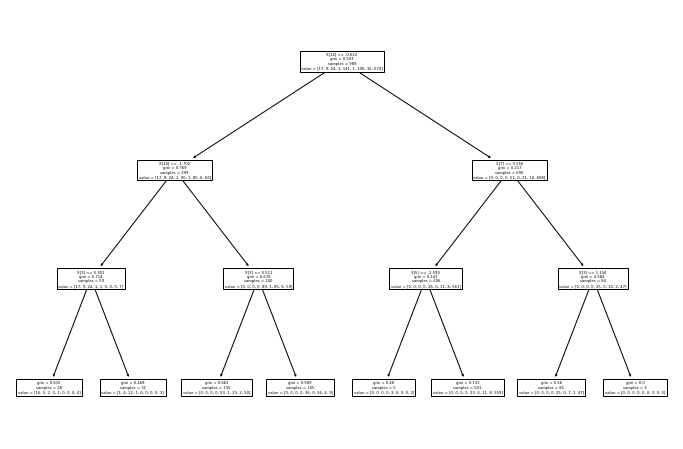

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

#use of dt----for feature engineering---- to select the best column

We can see from the tree that 15th column is taken as root node hence the class attribute has more dependency on the 15th column.

In [ ]:
acc_score = accuracy_score(y_pred_gini,y_test) 
print("Accuracy score",acc_score)
acc_dict['DecisionTree']=round(acc_score,3)
print(acc_dict)

Accuracy score 0.7909090909090909
{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0.791, 'LinearRegression': 0, 'LogisticRegression': 0, 'SVM': 0, 'MLP': 0}


linear regression
<br>
It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables

In [ ]:
from sklearn import linear_model

x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
pred = lm.predict(x_train)

#checking accuracy:
from sklearn.metrics import r2_score
predd = lm.predict(x_test)
acc_score = r2_score(y_test, predd)
acc_dict['LinearRegression']=round(acc_score,3)
print(acc_dict)

{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0.791, 'LinearRegression': 0.526, 'LogisticRegression': 0, 'SVM': 0, 'MLP': 0}


**lab7 ------------------------------------------------------- Logistic Regression -----------------------------------------------------------------------**

In [ ]:
x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  

#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[  1,   0,   0,   0,   2,   0,   2,   0,   2],
       [  0,   0,   0,   0,   2,   0,   3,   0,   0],
       [  0,   0,   4,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,  15,   0,   9,   0,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   1,   0,   9,   0,  14,   0,   7],
       [  0,   0,   0,   0,   1,   0,   0,   0,   5],
       [  0,   0,   0,   0,   8,   0,   2,   1, 228]])

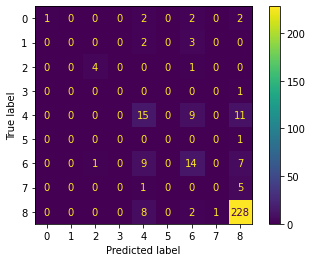

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)  

This heat map is applied for the heat map and it depicts the correctly and wrongly prdicted number of samples. Most of the smaples belonging to class 8 are correctly predicted where others are not predicted. Also there are more flase postives in class 4.

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.00      0.00      0.00         5
           2       0.80      0.80      0.80         5
           3       0.00      0.00      0.00         1
           4       0.41      0.43      0.42        35
           5       0.00      0.00      0.00         1
           6       0.45      0.45      0.45        31
           7       0.00      0.00      0.00         6
           8       0.89      0.95      0.92       239

    accuracy                           0.79       330
   macro avg       0.39      0.31      0.32       330
weighted avg       0.77      0.79      0.77       330



In [ ]:
tested_x = classifier.predict(x_test)

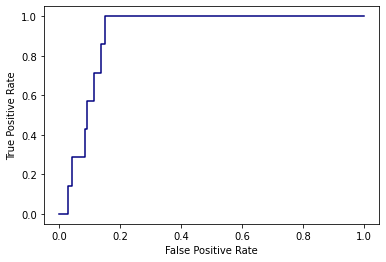

In [ ]:
from sklearn import metrics
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr ,color="navy")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The graph shows the ROC curve and since the curve is left dominant, we can see that the classifer is able to classify correctly.

In [ ]:
acc_score = accuracy_score(y_test, y_pred) 
print("Accuracy score",acc_score)
acc_dict['LogisticRegression']=round(acc_score,3)
print(acc_dict)

Accuracy score 0.793939393939394
{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0.791, 'LinearRegression': 0.526, 'LogisticRegression': 0.794, 'SVM': 0, 'MLP': 0}


**lab8 -----------------------------------------------------SVM -----------------------------------------------------------------------**

In [ ]:
x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  

from sklearn import svm
#create a classifier
svm_cls = svm.SVC(kernel="linear")
#train the model
svm_cls.fit(x_train,y_train)
#predict the response
pred = svm_cls.predict(x_test)

In [ ]:
from sklearn import metrics
#accuracy
y_pred=pred
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
print("Precision Score : ",  metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))
print("Recall Score :" ,  metrics.recall_score(y_test, y_pred, pos_label='positive', average='micro') )
print(metrics.classification_report(y_test, y_pred=pred))

acuracy: 0.7636363636363637
Precision Score :  0.7636363636363637
Recall Score : 0.7636363636363637
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.60      1.00      0.75         3
           2       1.00      0.80      0.89        10
           3       0.00      0.00      0.00         1
           4       0.37      0.38      0.37        45
           6       0.62      0.42      0.50        36
           7       0.00      0.00      0.00         6
           8       0.85      0.92      0.88       224

    accuracy                           0.76       330
   macro avg       0.51      0.54      0.52       330
weighted avg       0.74      0.76      0.75       330



In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[  4,   1,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0],
       [  1,   1,   8,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  17,   4,   0,  24],
       [  0,   0,   0,   0,  14,  15,   0,   7],
       [  0,   0,   0,   0,   1,   1,   0,   4],
       [  0,   0,   0,   0,  14,   4,   1, 205]])

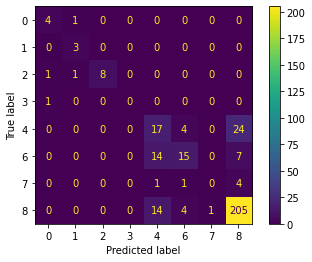

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_cls, x_test, y_test)  

This heat map is applied for the heat map and it depicts the correctly and wrongly prdicted number of samples. Most of the smaples belonging to class 8 are correctly predicted where others are not predicted. Also there are more flase postives in class 4.

In [ ]:
acc_score = accuracy_score(y_test, y_pred) 
print("Accuracy score",acc_score)
acc_dict['SVM']=round(acc_score,3)
print(acc_dict)

Accuracy score 0.7636363636363637
{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0.791, 'LinearRegression': 0.526, 'LogisticRegression': 0.794, 'SVM': 0.764, 'MLP': 0}


**lab9 -------------------------------------------------MLP-----------------------------------------------------------------------**

In [ ]:
x = num_df.drop('Events',axis=1) #independant variables
y = num_df['Events'] #dependant

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  
sc=StandardScaler()

scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
testX_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

In [ ]:
clf.predict_proba(x_test)
clf.score(x_test, y_test)

0.793939393939394

In [ ]:
pred = clf.score(x_train,y_train)
pred

0.7937310414560161

In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i]);
  clf.fit(x_train, y_train);
  tempscore = clf.score(x_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

Activation function - relu - Accuracy :  0.7553083923154702
Activation function - identity - Accuracy :  0.7573306370070778
Activation function - logistic - Accuracy :  0.80788675429727
Activation function - tanh - Accuracy :  0.8159757330637007


In [ ]:
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.54


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[  1   0   7   0   0   0   0   0]
 [  0   1   4   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  1   8  28   0   0   0   0  11]
 [  0   5  30   0   0   0   0   5]
 [  1   1   3   0   0   0   0   2]
 [  7  10  15   7   0   1   5 173]]


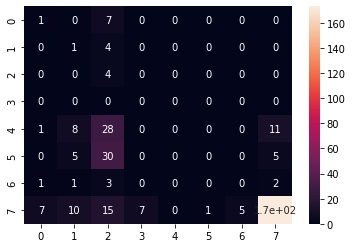

In [ ]:
sns.heatmap(cf_matrix, annot=True)

This heat map is applied for the heat map and it depicts the correctly and wrongly prdicted number of samples. Most of the smaples belonging to class 7 are correctly predicted where others are not predicted.

In [ ]:
acc_score = accuracy_score(y_test, y_pred) 
print("Accuracy score",acc_score)
acc_dict['MLP']=round(acc_score,3)
print(acc_dict)

Accuracy score 0.5424242424242425
{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0.791, 'LinearRegression': 0.526, 'LogisticRegression': 0.794, 'SVM': 0.764, 'MLP': 0.542}


**lab10 -------------------------------------------BPN---------------------------------------------------------------------**

In [ ]:
from sklearn.metrics import roc_auc_score

# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
X = num_df.drop('Events',axis=1)
y = num_df['Events']

X=X.values
y=y.values
y = pd.get_dummies(y).values

#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,),random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train),multi_class="ovr"))

Overall AUC: 0.9200155927809333


In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 500
N = y_train.size

# number of input features
input_size = 19 #number of other columns(independent)

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 9 #number of classesin class attribute  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

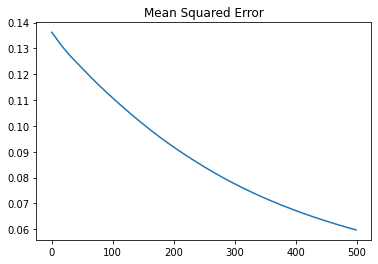

In [ ]:
results.mse.plot(title="Mean Squared Error")

The error decreses with each iteraton. the grapgh clearly depicts number of iterations vs error rates.

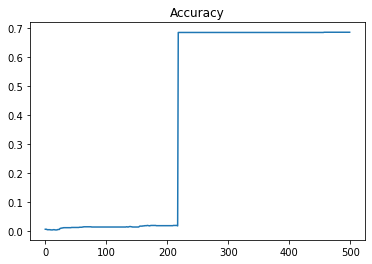

In [ ]:
results.accuracy.plot(title="Accuracy")

We can see the accuracy increases after the 200 iterations


In [ ]:
y_pred = clf.predict_proba(X_train)
print('Overall AUC:', roc_auc_score(y_train,y_pred,multi_class="ovr"))

Overall AUC: 0.9200155927809333


**all accuracy scores** 

{'KNN': 0.752, 'Naive bayes': 0.748, 'Kmeans': 0.066, 'Hierarchial': 0.008, 'DecisionTree': 0.791, 'LinearRegression': 0.526, 'LogisticRegression': 0.794, 'SVM': 0.764, 'MLP': 0.542}

 


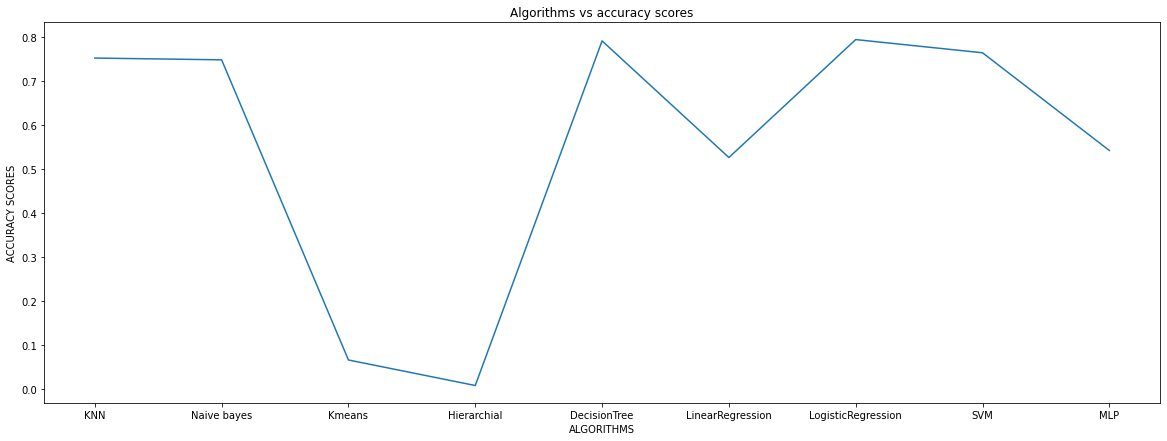

In [ ]:
keyList = []
valuesList = []

for key, value in acc_dict.items():
  keyList.append(key)
  valuesList.append(value)

plt.figure(figsize=(20, 7))
plt.title("Algorithms vs accuracy scores")
plt.plot(keyList, valuesList)
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY SCORES")  

print(acc_dict)
print("\n ")

When KNN, Naive Bayes, K means,  Hierarchial, Decision tree, Linear regression, Logistic regression, SVM and MLP algorithms were compared, the logistic regression has given more accuracy than all the algorithms. hence it is the best algorithm for the classification of austin weather dataset.